In [49]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]


In [50]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [51]:
clf = clf.fit(X, Y)
clf

DecisionTreeClassifier()

In [52]:
# 일반 예측
clf.predict([[2., 2.]])

array([1])

In [53]:
# predict_proba 비율 예측
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [54]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

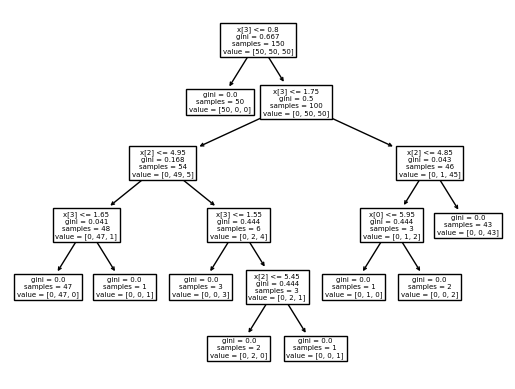

In [55]:
tree.plot_tree(clf)

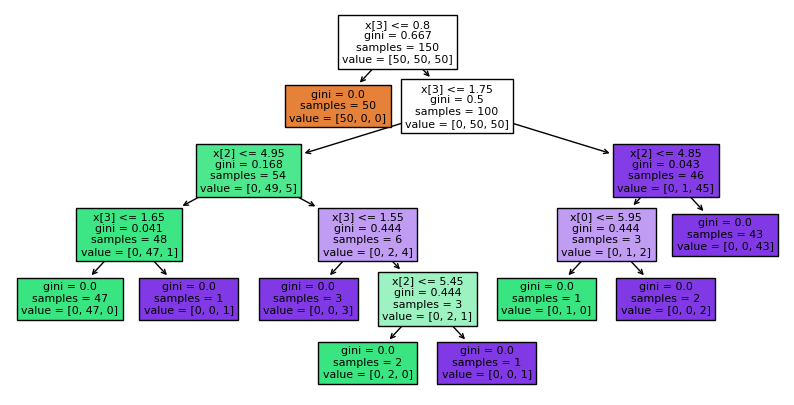

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
t = tree.plot_tree(clf, filled=True)

# 데이터 구성
* Pregnancies: 임신 횟수
* Glucose: 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure: 이완기 혈압 (mm Hg)
* SkinThickness: 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin: 2시간 혈청 인슐린 (mu U / ml)
* BMI: 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction: 당뇨병 혈통 기능
* Age: 나이
* Outcome: 768개 중에 268개의 결과 클래스 변수는 1이고 나머지는 0입니다.

## 필요한 라이브러리 로드

In [57]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('C:/Users/beoms/Desktop/STUDY/Naver DSP 2024/N_DSP_2024/diabetes.csv')
df.shape

(768, 9)

In [59]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
## 수치형 변수를 범주형 변수로 나누기

In [61]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]]

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False
...,...,...
763,10,True
764,2,False
765,5,False
766,1,False


## 학습, 예측 데이터셋 나누기

In [62]:
# 8:2 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담기
split_count = int(df.shape[0] * 0.8)
split_count

614

In [92]:
# 슬라이싱으로 데이터를 나눈기
df[:]
df[:1]
train = df[:split_count].copy()


In [93]:
test = df[split_count:].copy()


In [65]:
# 학습과 예측에 사용할 칼럼명 가져오기
feature_names = train.columns.tolist()
feature_names
# Outcome, Pregnancies 제거
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high']

In [66]:
# 예측할 칼럼의 이름 
label_name = "Outcome"
label_name

'Outcome'

### 학습, 예측 데이터셋 만들기

In [86]:
# 학습세트
train[feature_names]
x_train = train[feature_names]
print(x_train.shape)
x_train.head()
# Pregnancies_high 는 불리언 값. 

(614, 7)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies_high
0,148,72,35,0,33.6,0.627,False
1,85,66,29,0,26.6,0.351,False
2,183,64,0,0,23.3,0.672,True
3,89,66,23,94,28.1,0.167,False
4,137,40,35,168,43.1,2.288,False


In [68]:
# 정답 값
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [69]:
# 예측에 사용하는 데이터세트
x_test = test[feature_names]
print(x_test.shape)
x_test.head()

(154, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high
614,138,74,26,144,36.1,0.557,50,True
615,106,72,0,0,25.8,0.207,27,False
616,117,96,0,0,28.7,0.157,30,False
617,68,62,13,15,20.1,0.257,23,False
618,112,82,24,0,28.2,1.282,50,True


In [70]:
# 예측의 정답값
# Cross Validation?
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 머신러닝 알고리즘 가져오기

In [71]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

### 학습(훈련)
* 시험을 볼 때 기출문제(x_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.


In [72]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

### 예측
* 실전 시험문제(x_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [73]:
y_predict = model.predict(x_test)
y_predict

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

#### 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

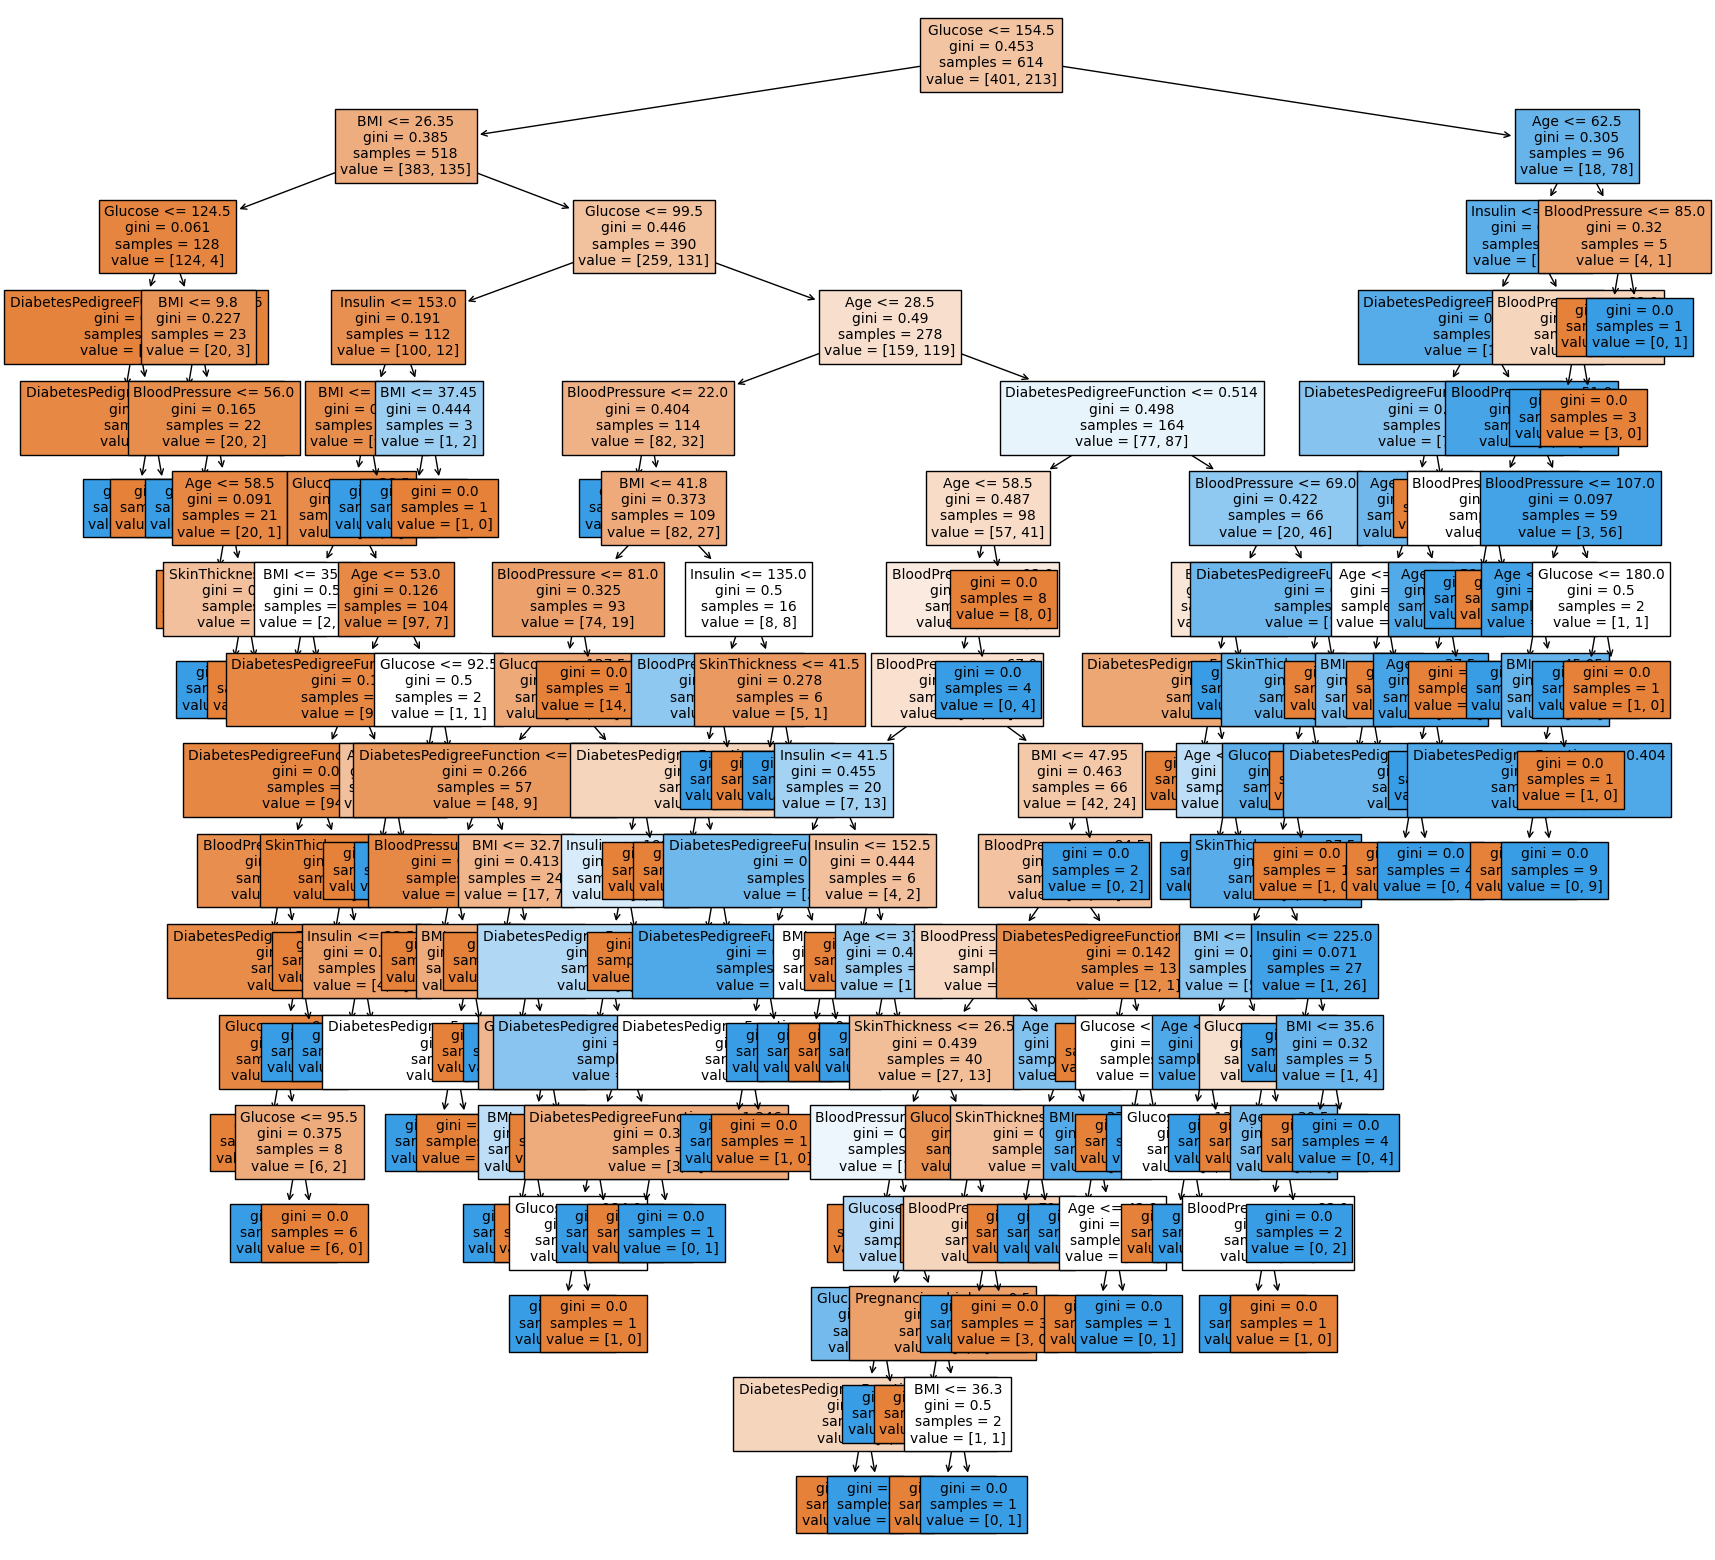

In [74]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names=feature_names, filled=True)

graphviz.Source(dot_tree)

In [76]:
# 피처의 중요도 추출하기
model.feature_importances_

array([0.33174715, 0.13638542, 0.03942356, 0.04506135, 0.19481851,
       0.14008325, 0.11032418, 0.00215658])

<Axes: >

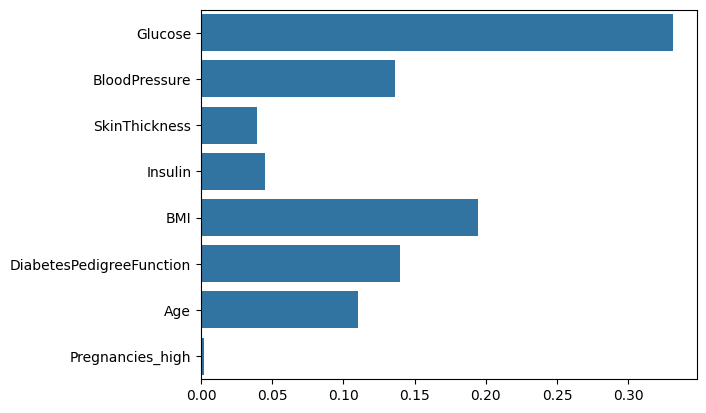

In [77]:
sns.barplot(x=model.feature_importances_,y=feature_names)

### 정확도 측정하기

In [78]:
# 실제값 - 예측값
# 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.

abs(y_test - y_predict).sum()

41

In [79]:
# 예측의 정확도 구하기. 100점 만점에 몇 점?
diff_count = abs(y_test - y_predict).sum()

(len(y_test)-diff_count) / len(y_test) * 100

73.37662337662337

In [80]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7337662337662337

In [81]:
model.score(x_test,y_test)

0.7337662337662337

In [82]:
# 범주형 변수를 수치형 변수로 : Age
# 25세 미만, 25세 이상 & 60세 미만, 60세 이상

In [112]:
df["Age_low"] = df["Age"] < 30
df["Age_middle"] = (df["Age"] >= 30) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_high', ylabel='count'>

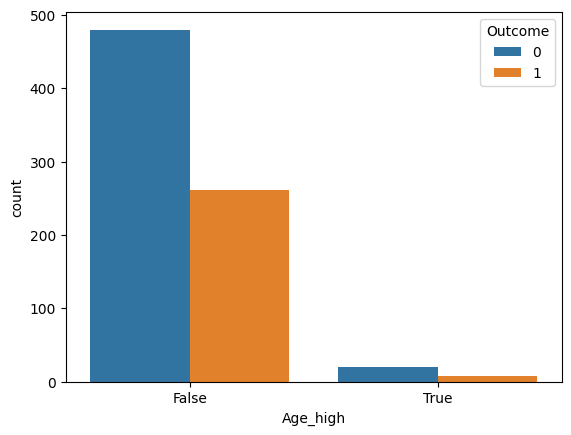

In [113]:
sns.countplot(data=df, x="Age_high", hue="Outcome")

In [114]:
# 학습과 예측에 사용할 칼럼명 가져오기
feature_names = df.columns.tolist()
feature_names
# Outcome, Pregnancies 제거
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Pregnancies_high',
 'Age_low',
 'Age_middle',
 'Age_high']

In [115]:
label_name = "Outcome"

In [116]:
# 학습세트 만들기
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 10)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies_high,Age_low,Age_middle,Age_high
0,148,72,35,0,33.6,0.627,False,False,True,False
1,85,66,29,0,26.6,0.351,False,False,True,False
2,183,64,0,0,23.3,0.672,True,False,True,False
3,89,66,23,94,28.1,0.167,False,True,False,False
4,137,40,35,168,43.1,2.288,False,False,True,False


In [117]:
y_train = train[label_name]
y_train.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [118]:
# 실전 시험문제 만들기
X_test = test[feature_names]
X_test.head()

y_test = test[label_name]
y_test.head()

614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

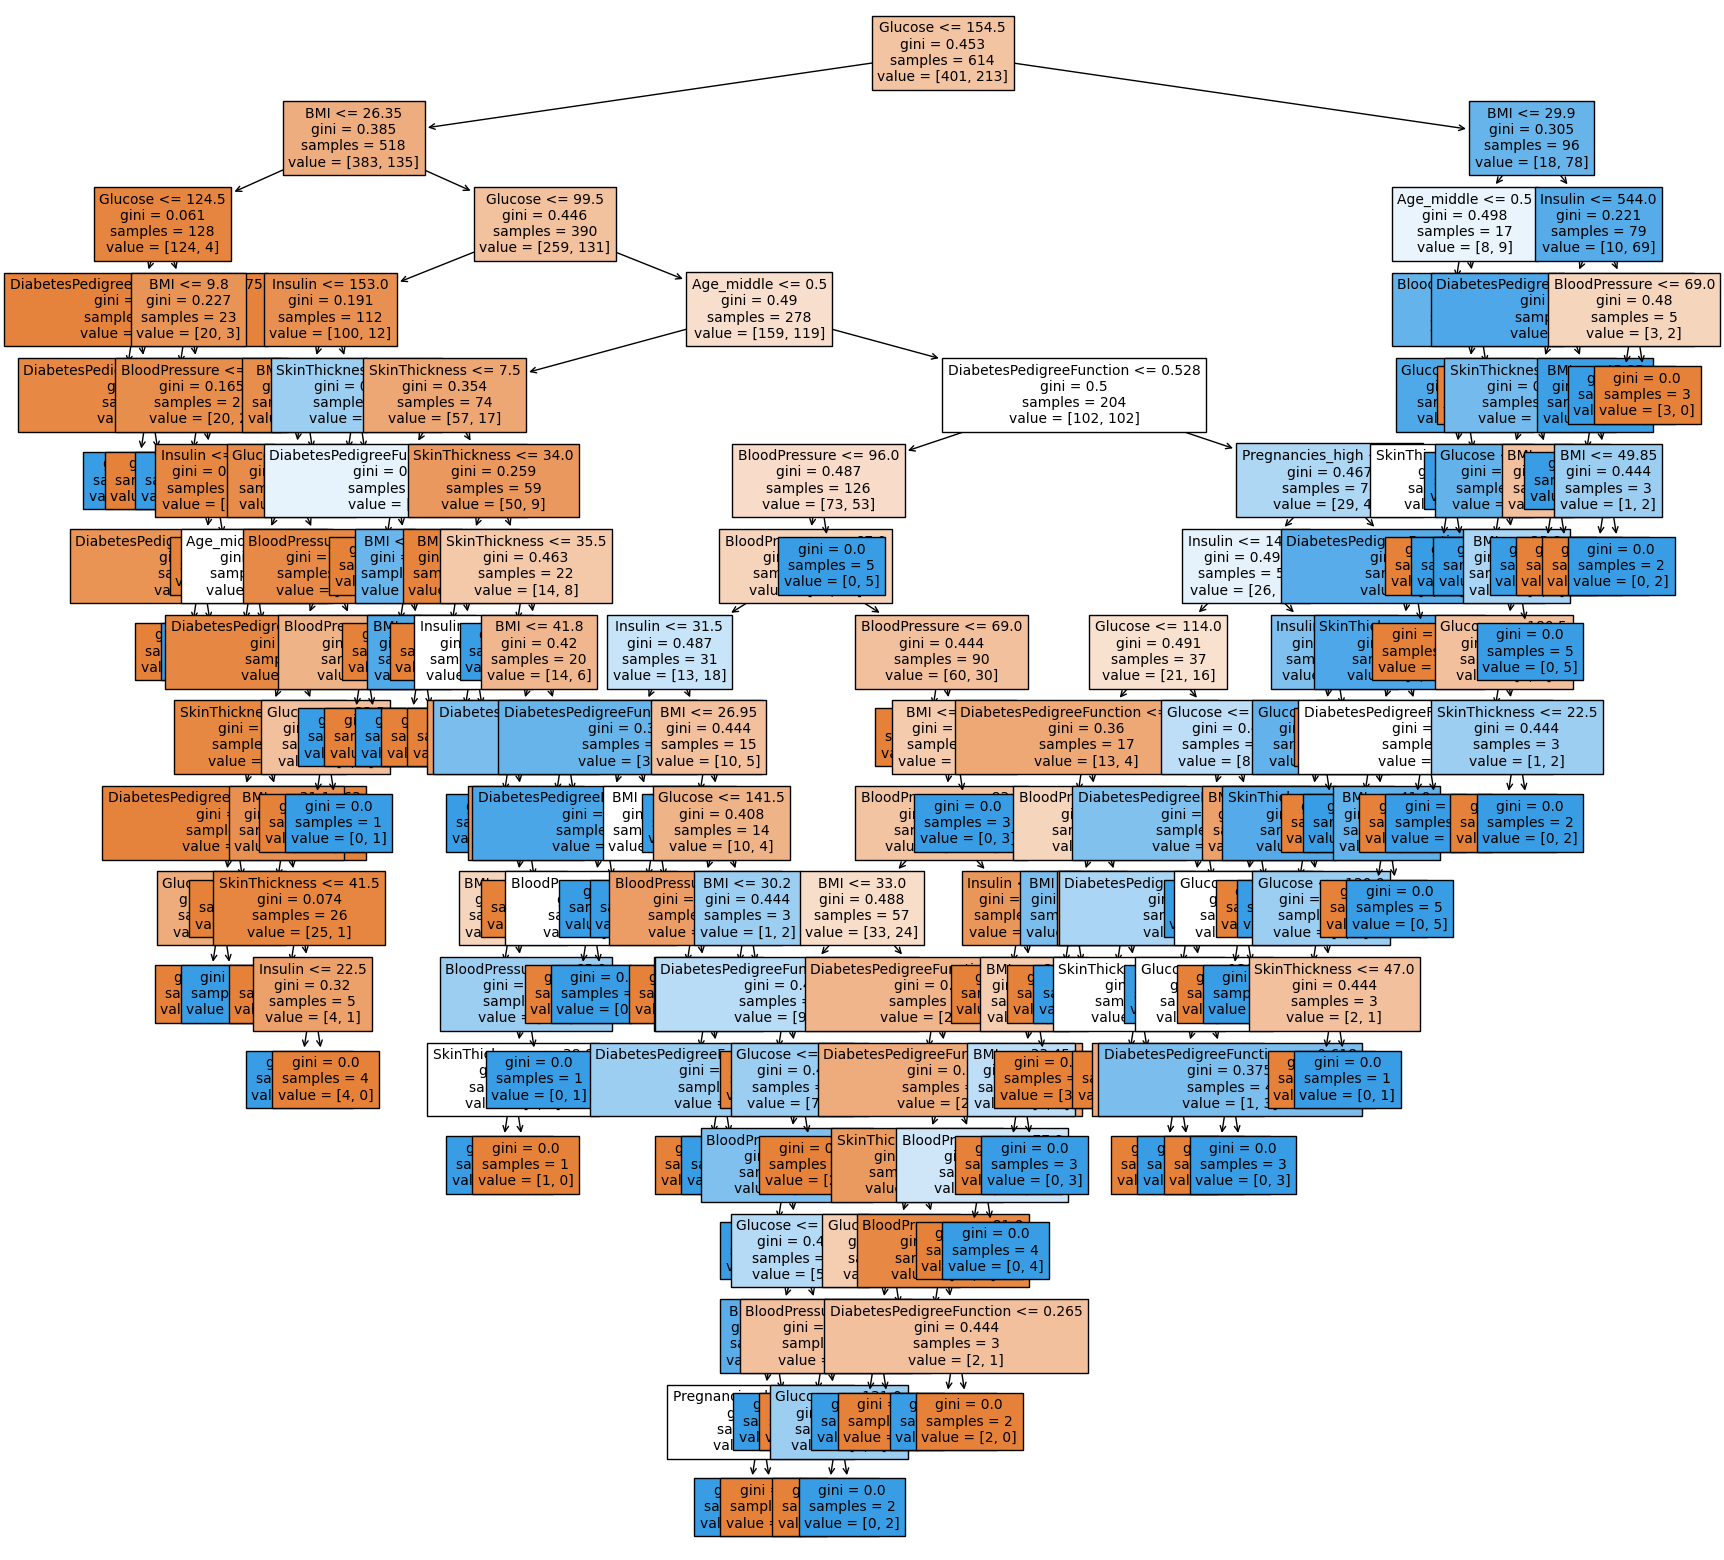

In [119]:
# 학습
model.fit(X_train, y_train)
# 예측
y_predict = model.predict(X_test)
# 시각화
plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

<Axes: >

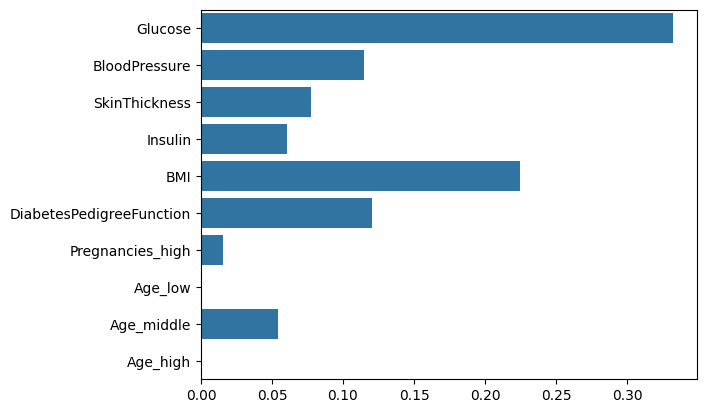

In [120]:
model.feature_importances_
sns.barplot(x=model.feature_importances_, y=feature_names)

# low, high 큰 역할 없음. middle 역할

In [121]:
diff_count = abs(y_test - y_predict).sum()
diff_count

51

In [122]:
# 결측치를 평균값으로 대체하기

In [127]:
df.describe()
# min이 0인 값들이 보임. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

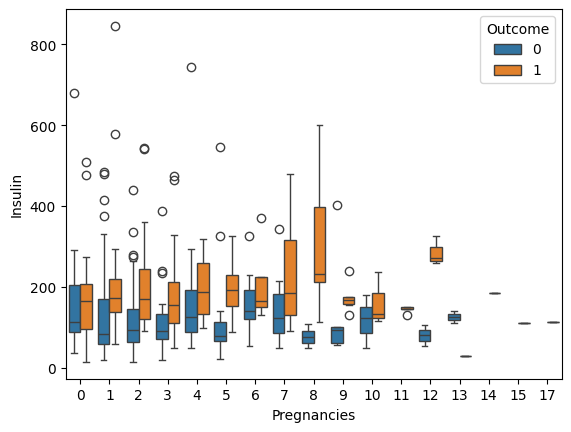

In [134]:
# 예를 들어서 insulin을 보자
sns.boxplot(data=df[df["Insulin"]>0],
            x = "Pregnancies", y="Insulin", hue="Outcome")

In [138]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]].head()
df["Insulin_nan"].isnull().sum(); df["Insulin_nan"].isnull().mean()
# Insulin의 결측치 비율이 매우 높음

0.4869791666666667

In [145]:
df.groupby(["Outcome"])[["Insulin", "Insulin_nan"]].agg(["mean", "median"])
# 결측치 처리를 하고 나니까 차이가 굉장히 커짐
# ML 돌리면 결측치가 존재해서 오류가 생김..

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [149]:
# 결측치 채우기
# outcome == 1(0) 이고 insulin_nan 의 값이 결측치인 경우, 그 때의 열 가져옴
df.loc[(df["Outcome"] ==0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 130
df.loc[(df["Outcome"] ==1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 206

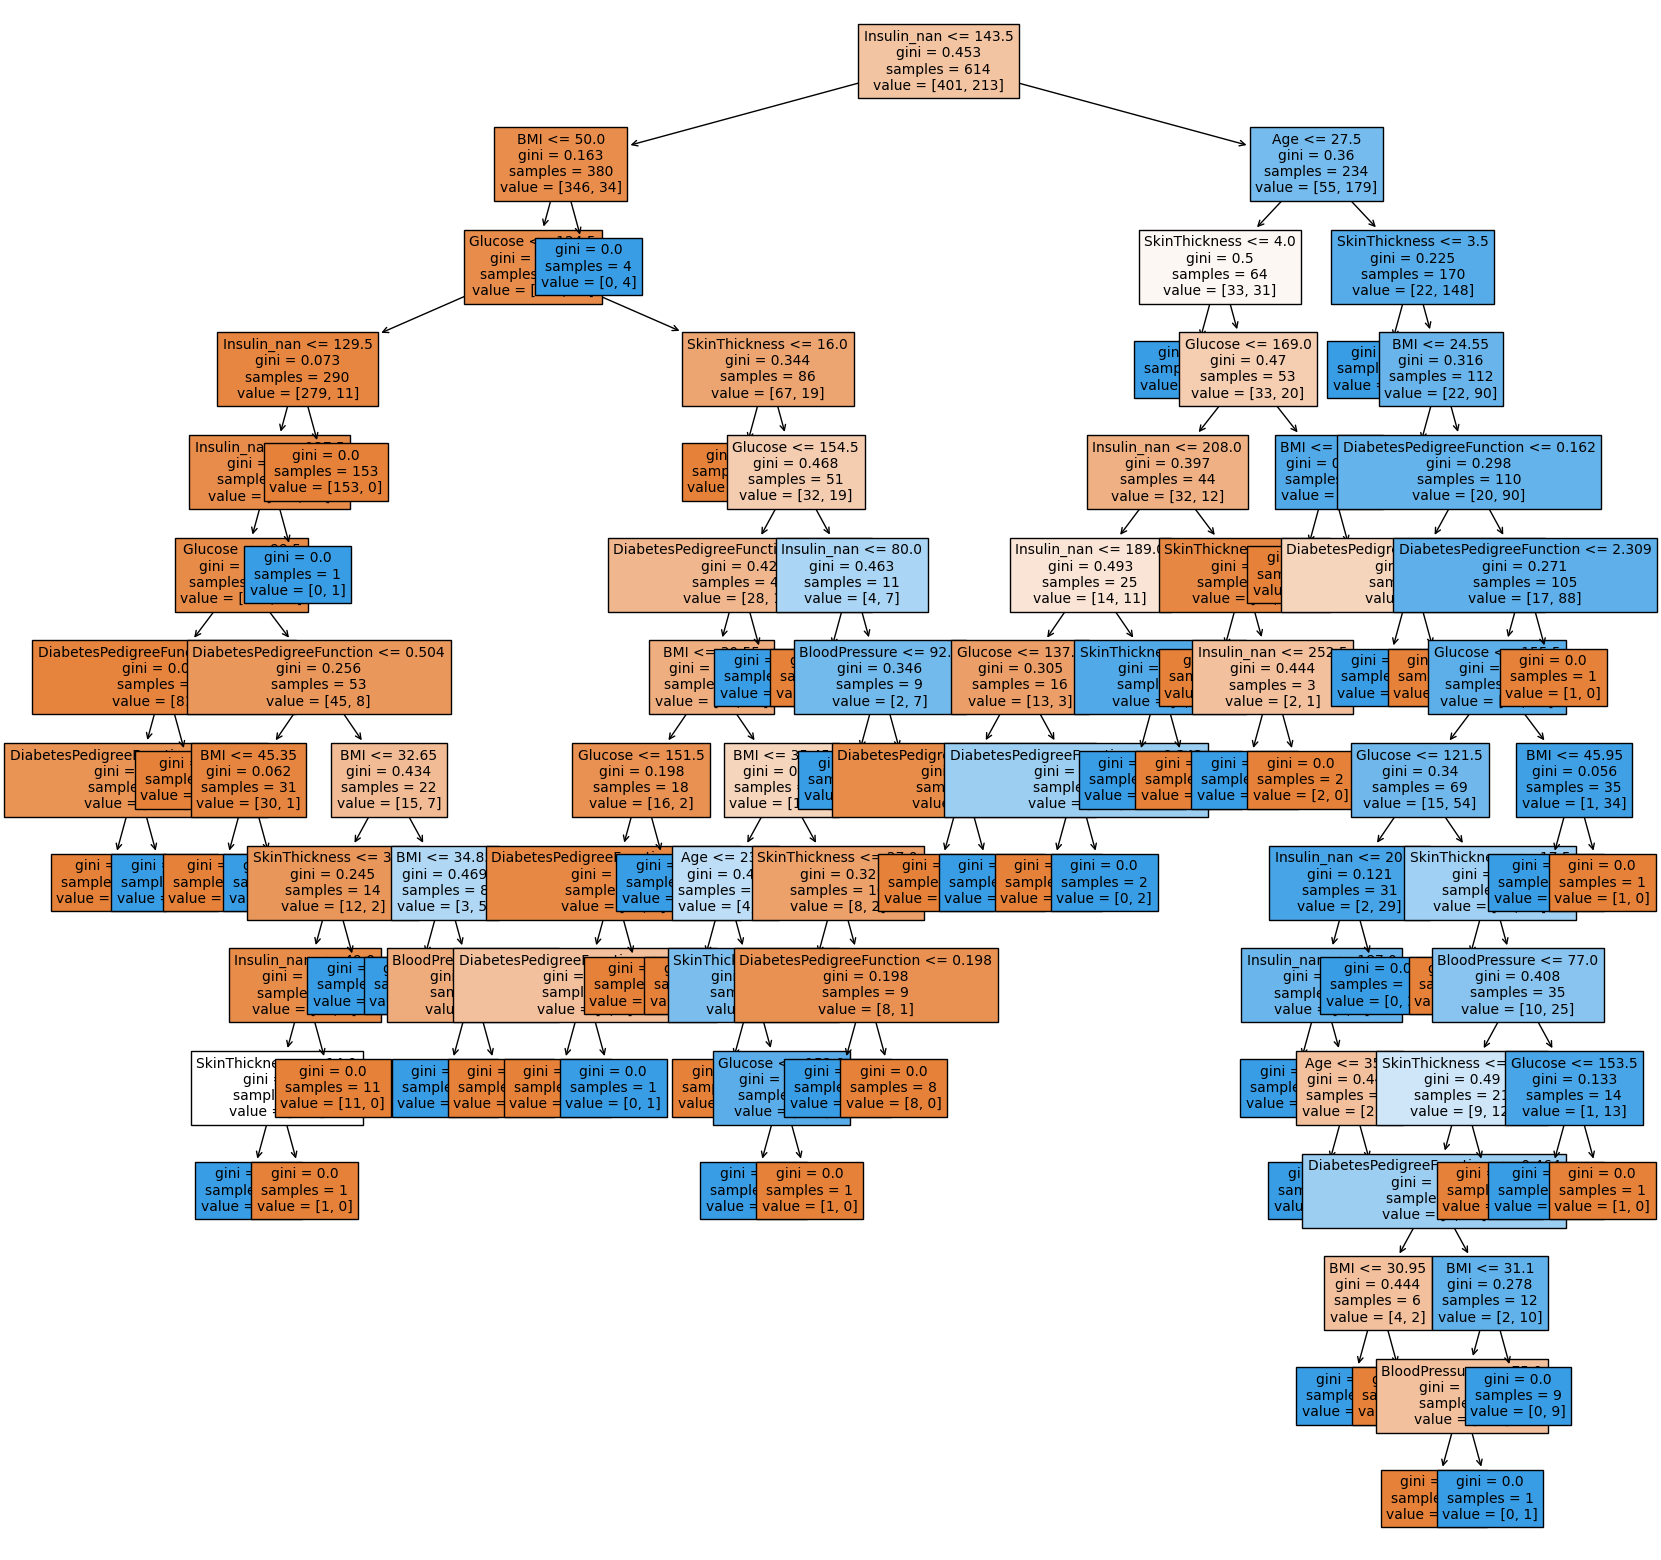

In [163]:
# 학습, 예측 전과정
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(random_state=42)

split_count = int(df.shape[0] * 0.8)

train = df[:split_count].copy()
test = df[split_count:].copy()

feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")

label_name = "Outcome"

X_train = train[feature_names]
y_train = train[label_name]

X_test = test[feature_names]
y_test = test[label_name]

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

plt.figure(figsize=(20,20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

<Axes: >

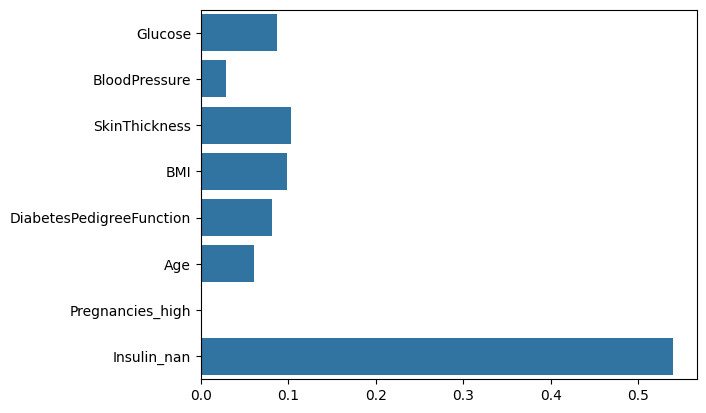

In [165]:
# 중요도 시각화
sns.barplot(x=model.feature_importances_, y=feature_names)

In [170]:
# 정확도 측정
diff_count = abs(y_test - y_predict).sum()
diff_count

# (len(y_test) - diff_count) / len(y_test) * 100

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) * 100

85.06493506493507